<a href="https://colab.research.google.com/github/sajidkhan2067/ML-Feature-Selection-RandomForestRegressor/blob/main/Feature_Selection_RandomForestRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the required modules.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import ipaddress
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix

# Number_of_samples determine the highest number of samples(rows) from the attack and normal dataset should be read and used.

In [ ]:
# number of benign traffic row = 2*number_of_samples
number_of_samples = 100000
# number of attack traffic row = number_of_samples_attack
number_of_samples_attack =100000

In [ ]:
# First, we get the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read data from attack and normal datasets located in google drive

In [ ]:
dfAttack = pd.concat(
    map(pd.read_csv, ['/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Attack/12 May/12udpfloodupf2.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Attack/12 May/12udpfloodupf1.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Attack/12 May/12tcpymasupf2.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Attack/12 May/12tcpymasupf1.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Attack/12 May/12tcpxmasupf2.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Attack/12 May/12tcpxmasupf1.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Attack/12 May/12tcpurgupf2.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Attack/12 May/12tcpurgupf1.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Attack/12 May/12tcpsynupf2.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Attack/12 May/12tcpsynupf1.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Attack/12 May/12tcprstupf2.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Attack/12 May/12tcprstupf1.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Attack/12 May/12tcppushupf2.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Attack/12 May/12tcppushupf1.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Attack/12 May/12tcpfinupf2.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Attack/12 May/12tcpfinupf1.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Attack/12 May/12tcpackupf2.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Attack/12 May/12tcpackupf1.pcap_Flow.csv',
                       '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/26 may - sample/26maytcpsynupf1.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/26 may - sample/26maytcpsynupf2.pcap_Flow.csv']),
    ignore_index=True)


default_value = 'attack'
dfAttack = dfAttack.assign(Label=default_value)



# Listed the features

In [ ]:
featuresForRandomForest=['Protocol','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max','Bwd Pkt Len Min','Bwd Pkt Len Mean','Bwd Pkt Len Std','Flow Byts/s','Flow Pkts/s','Flow IAT Mean','Flow IAT Std','Flow IAT Max','Flow IAT Min','Fwd IAT Tot','Fwd IAT Mean','Fwd IAT Std','Fwd IAT Max','Fwd IAT Min','Bwd IAT Tot','Bwd IAT Mean','Bwd IAT Std','Bwd IAT Max','Bwd IAT Min','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Header Len','Bwd Header Len','Fwd Pkts/s','Bwd Pkts/s','Pkt Len Min','Pkt Len Max','Pkt Len Mean','Pkt Len Std','Pkt Len Var','FIN Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','ACK Flag Cnt','URG Flag Cnt','CWE Flag Count','ECE Flag Cnt','Down/Up Ratio','Pkt Size Avg','Fwd Seg Size Avg','Bwd Seg Size Avg','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Subflow Fwd Pkts','Subflow Fwd Byts','Subflow Bwd Pkts','Subflow Bwd Byts','Init Fwd Win Byts','Init Bwd Win Byts','Fwd Act Data Pkts','Fwd Seg Size Min','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','Label']
featuresForRandomForestWithoutLabel=['Protocol','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max','Bwd Pkt Len Min','Bwd Pkt Len Mean','Bwd Pkt Len Std','Flow Byts/s','Flow Pkts/s','Flow IAT Mean','Flow IAT Std','Flow IAT Max','Flow IAT Min','Fwd IAT Tot','Fwd IAT Mean','Fwd IAT Std','Fwd IAT Max','Fwd IAT Min','Bwd IAT Tot','Bwd IAT Mean','Bwd IAT Std','Bwd IAT Max','Bwd IAT Min','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Header Len','Bwd Header Len','Fwd Pkts/s','Bwd Pkts/s','Pkt Len Min','Pkt Len Max','Pkt Len Mean','Pkt Len Std','Pkt Len Var','FIN Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','ACK Flag Cnt','URG Flag Cnt','CWE Flag Count','ECE Flag Cnt','Down/Up Ratio','Pkt Size Avg','Fwd Seg Size Avg','Bwd Seg Size Avg','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Subflow Fwd Pkts','Subflow Fwd Byts','Subflow Bwd Pkts','Subflow Bwd Byts','Init Fwd Win Byts','Init Bwd Win Byts','Fwd Act Data Pkts','Fwd Seg Size Min','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min']

In [ ]:
dfAttack=dfAttack[featuresForRandomForest]

#Reading benign traffic from google drive

In [ ]:
dfBenign = pd.concat(
    map(pd.read_csv, ['/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/30upf2.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/30upf1.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/30pingupf2.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/30pingupf2.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/30pingupf1.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/30Aprilupf2.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/30Aprilupf1.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/30-1upf2.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/30-1upf1.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/29Aprilupf2.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/29Aprilupf1.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/2mayupf2.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/2mayupf1.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/2maysshupf2.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/2maysshupf1.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/2maydownloadupf2.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/2maydownloadupf1.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/2maydownload-1upf2.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/2maydownload-1upf1.pcap_Flow.csv',
                      ]),
    ignore_index=True)


default_value = 'Benign'
dfBenign = dfBenign.assign(Label=default_value)


In [ ]:
print(featuresForRandomForest)
dfBenign=dfBenign[featuresForRandomForest]

['Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Av

# Taking random sample from both data frames

In [ ]:
dfBenign=dfBenign.sample(n=100000)
dfAttack=dfAttack.sample(n=100000)

In [ ]:
print(dfBenign.shape)
print(dfAttack.shape)

(100000, 78)
(100000, 78)


# Drop unwanted columns

In [ ]:
dfAttack = dfAttack.replace([np.inf, -np.inf], np.nan)
dfBenign = dfBenign.replace([np.inf, -np.inf], np.nan)


#Replace NaN values in DataFrame with the mean of each column, making changes directly in the DataFrame

In [ ]:
dfAttack.fillna(dfAttack.mean(), inplace=True)
dfBenign.fillna(dfBenign.mean(), inplace=True)

In [ ]:
print(dfAttack.shape)
print(dfBenign.shape)

(100000, 78)
(100000, 78)


In [ ]:
#Creating Y_normal using benign traffic
Y_normal = pd.concat([pd.DataFrame(dfBenign['Label'])], axis=0)
#Creating Y_attack using attack traffic
Y_attack= pd.concat([pd.DataFrame(dfAttack['Label'])], axis=0)
#Taking same number of attack and benign traffic
Y_attack=Y_attack.sample(n=Y_normal.shape[0])
#Creating X_normal using benign traffic
X_normal = pd.concat([pd.DataFrame(dfBenign[featuresForRandomForestWithoutLabel].values)], axis=0)
#Creating X_attack using attack traffic
X_attack = pd.concat([pd.DataFrame(dfAttack[featuresForRandomForestWithoutLabel].values)], axis=0)
#Same number of attack and benign traffic
X_attack=X_attack.sample(n=X_normal.shape[0])
#Combining benign and attack in X
X=np.concatenate((X_normal,X_attack))


print(X.shape)
print(X[0].shape)
print(len(X))
print(len(X_normal))
print(len(X_attack))

print(len(Y_normal))
print(len(Y_attack))

Y_attack=Y_attack.values.flatten()  //converting Pandas DataFrame to a one-dimensional NumPyarray
Y_normal=Y_normal.values.flatten()


Y=np.concatenate((Y_normal,Y_attack))  // combining benign and attack in Y



(200000, 77)
(77,)
200000
100000
100000
100000
100000


# Standardise the data

In [ ]:
scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
scalar.fit(X)
X = scalar.transform(X)
print(X[0:1])
print(X.shape)

[[-0.28590023 -0.40920645 -0.0216148  -0.01685734 -0.04843969 -0.01426385
   0.53580505 -0.84731458  0.29434716  2.49736688 -0.98846656 -0.80137913
  -1.05923943 -0.61838377  0.05181647 -0.0797541  -0.94146656 -0.52245877
  -0.80142482 -0.73664777 -0.36455831 -0.75448142 -0.43943    -0.70059545
  -0.60878779 -0.29183511 -0.24485931 -0.26931026 -0.30651288 -0.09103866
   0.         -0.2523767   0.         -0.21805553 -0.01898855 -0.01359242
  -0.07345145 -0.07783634 -0.80072818  0.04131231 -0.66830322  0.549683
   0.0152655  -0.33825614 -0.63729384 -0.32183247 -0.2523767   1.68427529
  -0.21805553 -0.2272705  -0.22928288 -1.02622925 -0.59658847  0.29434716
  -1.05923943  0.          0.          0.          0.          0.
   0.         -0.0216148  -0.04843969 -0.01685734 -0.01426385  0.
   1.07627593 -0.05478792  0.         -0.04758705 -0.15332468 -0.07716659
  -0.03168088 -0.74552066 -0.31003933 -0.68173106 -0.71153895]]
(200000, 77)


# the class field, replace value 'attack' with 0 and 'normal' with 1

In [ ]:
for i in range(0,len(Y)):
  if Y[i] =="attack":
    Y[i]=0
  else:
    Y[i]=1



In [ ]:
I=X  //X is assigning to I because the value of X has changed several times before, so for the sake of easy calcuation it is done like that

In [ ]:

print(X[198:199])
print(X.shape)

[[-0.28590023 -0.36004119 -0.00498712 -0.01134982 -0.02258601 -0.0126078
   0.55271568 -0.84731458 -0.72134864  0.87432553  1.89550841 -0.80137913
   0.43290306  1.85569476 -0.01839146 -0.08378743 -0.90846883 -0.27665406
  -0.42129352 -0.73669836 -0.31422238 -0.69273311 -0.07911699 -0.29891767
  -0.60883402 -0.2908514  -0.24429352 -0.26839541 -0.30573898 -0.09103818
   0.         -0.2523767   0.         -0.21805553 -0.00220868 -0.00750772
  -0.07881278 -0.08052594 -0.80072818  1.83714098 -0.14052782  1.34061056
   0.97301651 -0.33825614  1.56913489 -0.32183247 -0.2523767  -0.59372717
  -0.21805553 -0.2272705  -0.22928288  0.57551456 -0.31897543 -0.72134864
   0.43290306  0.          0.          0.          0.          0.
   0.         -0.00498712 -0.02258601 -0.01134982 -0.0126078   0.
   1.07627593 -0.00787199  0.         -0.04758705 -0.15332468 -0.07716659
  -0.03168088 -0.74552066 -0.31003933 -0.68173106 -0.71153895]]
(200000, 77)


The line `X_train, X_test, Y_train, Y_test = train_test_split(I, Y, test_size=0.2, random_state=42)` is using the `train_test_split` function from a machine learning library, likely scikit-learn.

Here's a breakdown:

- `I`: This is the input data (features or independent variables).
- `Y`: This is the target variable (dependent variable or labels).

The function is splitting the dataset into training and testing sets:

- `X_train`: The training set of input data.
- `X_test`: The testing set of input data.
- `Y_train`: The training set of target variable.
- `Y_test`: The testing set of target variable.

- `test_size=0.2`: Specifies that 20% of the data will be used for testing, and the remaining 80% will be used for training.

- `random_state=42`: This provides a seed for the random number generator, ensuring that the split is reproducible. Using the same seed (in this case, 42) will result in the same split every time the code is run.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(I, Y, test_size = 0.2, random_state=42)

#Checking various shapes for debugging

In [ ]:
print(X.shape)
print(I.shape)
print(X_train.shape)
print(X_test.shape)
print(" ")
print(Y_train.shape)
print(Y_test.shape)

(200000, 77)
(200000, 77)
(160000, 77)
(40000, 77)
 
(160000,)
(40000,)


In [ ]:
import numpy as np
# from sklearn.datasets import and plot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

RandomForestRegressor(random_state=0): This initializes a RandomForestRegressor with a specified random state (0 in this case). The random state ensures reproducibility, meaning that if you run the code again with the same random state, you should get the same results.

rf.fit(X_train, Y_train): This fits (trains) the RandomForestRegressor on the training data. X_train is the input features, and Y_train is the target variable. The model learns the patterns in the training data to make predictions.

After this step, the rf variable contains a trained RandomForestRegressor model that can be used to make predictions on new, unseen data.

In [ ]:
rf = RandomForestRegressor(random_state=0)

rf.fit(X_train,Y_train)

RandomForestRegressor(random_state=0)

# Generates a horizontal bar chart to visualize the feature importances, ranking features from least to most important based on their scores obtained from a RandomForest model.

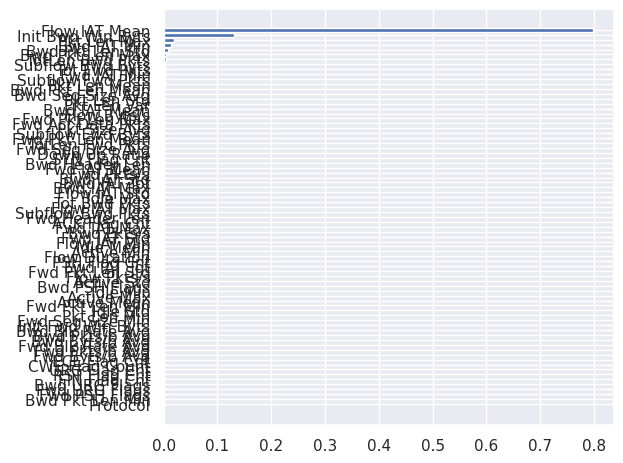

In [ ]:
f_i = list(zip(featuresForRandomForestWithoutLabel,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.tight_layout()
plt.show()

In [ ]:
rfe = RFECV(rf,cv=2,scoring="neg_mean_squared_error")

history =rfe.fit(X_train,Y_train)

# Final result shows the most impactful features of this data-set

In [ ]:
selected_features = np.array(featuresForRandomForestWithoutLabel)[rfe.get_support()]
print(selected_features)

['Flow IAT Mean' 'Bwd IAT Min' 'Pkt Len Max' 'Init Bwd Win Byts']
